In [5]:
import tensorflow as tf
import numpy as np
a = tf.cast([1, 2], dtype = tf.float32)
a = tf.reshape(a, (-1, 1))

In [6]:
x = tf.cast(np.random.normal(size=(10, 2)), dtype=tf.float32)


In [13]:
logits = x @ a
probs = tf.exp(logits) / (1 + tf.exp(logits))

In [14]:
tf.concat([probs, 1-probs], axis= 1)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.02894572, 0.97105426],
       [0.7119273 , 0.2880727 ],
       [0.11801468, 0.8819853 ],
       [0.8809856 , 0.11901438],
       [0.4200891 , 0.5799109 ],
       [0.3149579 , 0.68504214],
       [0.3377741 , 0.6622259 ],
       [0.84252274, 0.15747726],
       [0.21136895, 0.7886311 ],
       [0.7473265 , 0.2526735 ]], dtype=float32)>

In [15]:
probs

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.02894572],
       [0.7119273 ],
       [0.11801468],
       [0.8809856 ],
       [0.4200891 ],
       [0.3149579 ],
       [0.3377741 ],
       [0.84252274],
       [0.21136895],
       [0.7473265 ]], dtype=float32)>

In [16]:
logits

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-3.51296   ],
       [ 0.90476286],
       [-2.0113664 ],
       [ 2.0017962 ],
       [-0.32240772],
       [-0.77704144],
       [-0.6732295 ],
       [ 1.6771199 ],
       [-1.3166933 ],
       [ 1.0844039 ]], dtype=float32)>

In [17]:
x 

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.2693168 , -1.8911383 ],
       [ 0.9198729 , -0.00755502],
       [-0.34966707, -0.8308497 ],
       [ 0.3362664 ,  0.83276486],
       [ 1.4953445 , -0.9088761 ],
       [-0.30576265, -0.2356394 ],
       [ 0.06781466, -0.37052208],
       [ 1.2065172 ,  0.23530132],
       [-0.7051262 , -0.30578354],
       [ 1.0179478 ,  0.03322802]], dtype=float32)>

In [18]:
tf.norm(x, axis = 1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.9102187 , 0.919904  , 0.9014312 , 0.8980937 , 1.7498889 ,
       0.38602683, 0.37667686, 1.2292479 , 0.76857436, 1.01849   ],
      dtype=float32)>

In [1]:
import generate_data
generate_data.get_data()


In [1]:
import loss_ratio
import numpy as np
import tensorflow as tf
#loss_ratio.mean_ratio([1, 1], [1, 1], num_steps=10)

In [30]:
theta = [2, 1]
fair_direction = [0, 1]
x, y = np.load('data/x.npy'), np.load('data/y.npy')
x, y = tf.cast(x, dtype = tf.float32), y.astype('int32')


In [31]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [32]:
y = tf.one_hot(y, 2)

cl = loss_ratio.linear_classifier(theta)
while np.linalg.norm(fair_direction) != 1:
    fair_direction = fair_direction / np.linalg.norm(fair_direction)
fair_metric = loss_ratio.fair_metric_fn(fair_direction)
    

In [4]:
import itertools
theta1 = np.arange(0, 5, step = 0.2)
theta2 = np.arange(0, 5, step= 0.2)
a = itertools.product(theta1, theta2)


In [5]:
import numpy as np
import seaborn as sns

In [6]:
a = np.meshgrid(theta1, theta2)

In [52]:
f = lambda a, b, c : a+b+c
from functools import partial
g = partial(f, b= 2, c= 3)

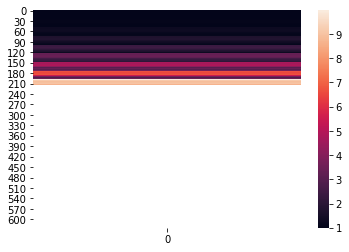

In [14]:
b = np.load('data/mean_ratio_theta_l2_base_fair.npy').reshape((-1, 1))
ax = sns.heatmap(b)

In [15]:
b

array([[1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.0677738],
       [1.0674325],
       [1.0677991],
       [1.0688821],
       [1.0706686],
       [1.0730966],
       [1.0760083],
       [1.0790936],
       [1.0818558],
       [1.0836087],
       [1.0834703],
       [1.0804508],
       [1.0739456],
       [1.0645294],
       [1.0541422],
       [1.0456173],
       [1.0388372],
       [1.0342597],
       [1.0307276],
       [1.0273356],
       [1.0244031],
       [1.0226572],
       [1.0198991],
       [1.0163085],
       [1.0137213],


In [26]:
import numpy as np
import tensorflow as tf
import utils
import itertools
import multiprocessing as mp
from functools import partial

def linear_classifier(theta):
    theta = tf.cast(theta, dtype = tf.float32)
    theta = tf.reshape(theta, (-1, 1))
    def classifier(x):
        logits = x @ theta
        probs = 1 / (1 + tf.exp(-logits))
        return tf.concat([1-probs, probs], axis= 1)
    return classifier


def fair_metric_fn(theta):
    theta = tf.cast(theta, dtype = tf.float32)
    theta = tf.reshape(theta, (-1, 1))
    def fair_metric(x):
        return tf.norm(x @ theta, axis = 1)
    return fair_metric

def sample_perturbation(x, y, classifier, fair_metric, regularizer = 5, learning_rate = 2e-2, num_steps = 200):
    x = tf.reshape(x, (1, -1))
    y = tf.reshape(y, (1, -1))
    x_start = x
    x_fair = x
    #x += tf.cast(np.random.normal(size=(1, 39)), dtype = tf.float32)*1e-9
    for i in range(num_steps):
        with tf.GradientTape() as g:
            g.watch(x_fair)
            prob = classifier(x_fair)
            loss = utils.EntropyLoss(y, prob)  - regularizer * tf.reduce_sum(fair_metric(x_fair - x_start)**2)
        
        

        gradient = g.gradient(loss, x_fair)
        if i == 0:
            x_fair0, x_fair = x_fair, x_fair + learning_rate * gradient#utils.protected_direction(gradient, sensetive_directions)
        else:
            if not tf.reduce_all(tf.math.is_finite(loss)):
                x_fair = x_fair0
                break
            x_fair0, x_fair = x_fair, x_fair + learning_rate * gradient

            
    ratio = utils.EntropyLoss(y, classifier(x_fair)) / utils.EntropyLoss(y, classifier(x_start))
    return ratio.numpy()


def sample_perturbation_l2_base(x, y, classifier, fair_metric, regularizer = 5, learning_rate = 2e-2, num_steps = 200):
    x = tf.reshape(x, (1, -1))
    y = tf.reshape(y, (1, -1))
    x_start = x
    x_fair = x
    x_base = x
    #x += tf.cast(np.random.normal(size=(1, 39)), dtype = tf.float32)*1e-9
    for _ in range(num_steps):
        with tf.GradientTape() as g:
            g.watch(x_fair)
            prob = classifier(x_fair)
            loss = utils.EntropyLoss(y, prob)  - regularizer * tf.reduce_sum(fair_metric(x_fair - x_start)**2)

        gradient = g.gradient(loss, x_fair)
        x_fair = x_fair + learning_rate * gradient#utils.protected_direction(gradient, sensetive_directions)

    for _ in range(num_steps):
        with tf.GradientTape() as g:
            g.watch(x_base)
            prob = classifier(x_base)
            perturb = x_base-x_start
            loss = utils.EntropyLoss(y, prob)  - regularizer * tf.norm(perturb)**2

        gradient = g.gradient(loss, x_base)
        x_base = x_base + learning_rate * gradient

    

    ratio = utils.EntropyLoss(y, classifier(x_fair)) / utils.EntropyLoss(y, classifier(x_base))
    
    return ratio.numpy()

In [38]:
x, y = np.load('data/x.npy'), np.load('data/y.npy')
x, y = tf.cast(x, dtype = tf.float32), y.astype('int32')
y = tf.one_hot(y, 2)
fair_direction = [ 0, 1]
cl = linear_classifier([1, 4])
regularizer, learning_rate, num_steps = 1, 2e-2, 100
while np.linalg.norm(fair_direction) != 1:
    fair_direction = fair_direction / np.linalg.norm(fair_direction)
fair_metric = fair_metric_fn(fair_direction)
ratios = []
for u, v in zip(x[:20], y[:20]):
    r = sample_perturbation(u, v, classifier  = cl, fair_metric = fair_metric, regularizer=regularizer,\
             learning_rate=learning_rate, num_steps=num_steps)
    ratios.append(r)

In [39]:
ratios

[50.10922,
 25.661558,
 1.0354818,
 55.03333,
 48.139233,
 1.0816996,
 4.887246,
 1.9690531,
 1.6287695,
 7.400978,
 3.9996421,
 2.5748584,
 47.405563,
 1.5347925,
 10.173886,
 11.4116955,
 3.7600076,
 5.8389363,
 6.4400516,
 9.006058]

In [29]:
a = tf.cast([1, np.nan], dtype=tf.float32)

In [17]:
tf.reduce_all(tf.math.is_finite(a))

<tf.Tensor: shape=(), dtype=bool, numpy=False>